#**THE SPARK FOUNDATION**
## September2022 - Internship
### Task 01

## **Creator: Qurat Ul Ain**



---



##Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


##Loading Dataset

In [ ]:
# dataset: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)
print("Data has been loaded successfully")

df.head()

Data has been loaded successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Dataset Description

In [ ]:
df.keys()

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


###Dataset Dimensions

In [ ]:
df.shape

(25, 2)

##Exploratory Data Analysis

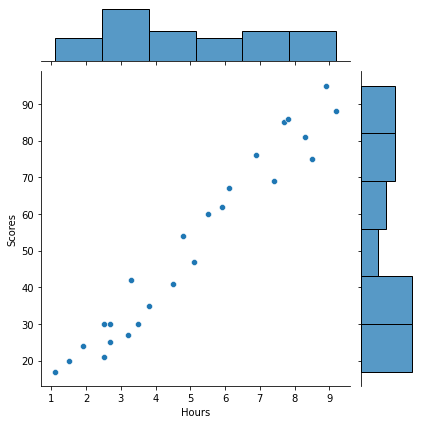

In [ ]:
sns.jointplot(data=df, x="Hours", y="Scores")


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
target= df.Scores #Score is set to target:Y
print(target)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [ ]:
data = df.drop(['Scores'], axis=1)
print(data)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
dtypes: float64(1)
memory usage: 328.0 bytes


In [ ]:
print ("Dataset : ", df.shape)
print ("X-Data : ", data.shape)
print ("Y-Target : ", target.shape)

Dataset :  (25, 2)
X-Data :  (25, 1)
Y-Target :  (25,)


##Data Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

Tain - Test Data Dimensions

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18, 1), (18,), (7, 1), (7,))

## Linear Regression Model
### Importing LinearRegression Model from sk-learn Library

In [ ]:
model = linear_model.LinearRegression()

Fitting the model

In [ ]:
model.fit(X_train, y_train)


LinearRegression()

Checking the accuracy of model

In [ ]:
acc= model.score (X_train, y_train) 
print ("Accuracy:  %.2f" % acc)

Accuracy:  0.95


## Plotting Regression Line

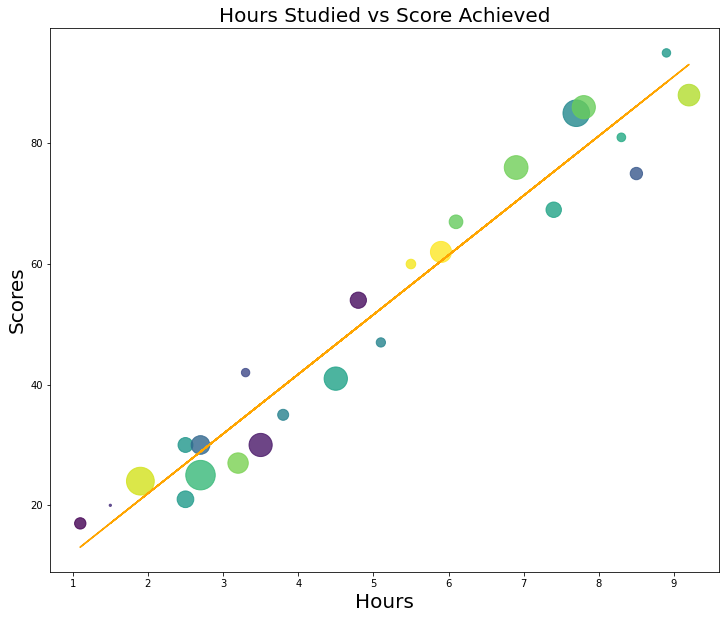

In [ ]:
# Plotting the regression line
#regression = m*x+c ( m=model.coef_, x= data, c=c = model.intercept_ )
reg_line = model.coef_*data+model.intercept_
plt.figure(figsize=(12,10))
N = 25
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(data,target, s=area, c=colors, alpha=0.8)
plt.plot(data,reg_line,lw=1.5, c="ORANGE")
plt.xlabel("Hours",{'size':20})
plt.ylabel("Scores",{'size':20})
plt.title("Hours Studied vs Score Achieved",{'size':20})
plt.show()

In [ ]:
 # Predicting the scores
y_pred = model.predict(X_test)

In [ ]:
# Comparing Actual vs Predicted
pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})  
pred

,Actual,Predicted
6,88,93.085057
11,62,60.486603
5,20,17.021998
0,21,26.900318
17,24,20.973326
4,30,36.778637
21,54,49.620452


##Performance Evaluation 

In [ ]:
print("------------------ Evaluation Metrics of Linear Regression Model ------------------")
print("       Coefficients              : %.2f" % model.coef_)
print("       Intercept                 : %.2f" % model.intercept_)
print("       Mean squared error (MSE)   : %.2f"% mean_squared_error(y_test, y_pred))
print("       Coefficient of determination (R^2):  %.2f" % r2_score(y_test, y_pred))

------------------ Evaluation Metrics of Linear Regression Model ------------------
       Coefficients              : 9.88
       Intercept                 : 2.20
       Mean squared error (MSE)   : 20.87
       Coefficient of determination (R^2):  0.96


## Question: What will be predicted score if Student studies for 9.25 hours per day?

In [ ]:
# Make predictions using the custom test value
hour = 9.25
std_pred=model.predict(np.array(hour).reshape(-1, 1))
print("Score of 9.25 hour study a day is : %.2f" % std_pred)

Score of 9.25 hour study a day is : 93.58


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
